# Homework 1 - Linear Regression
In this homework<br/>
-you will be implementing simple linear regression and multiple linear regression<br/>
-you will compute R2 and Adjusted R2 scores<br/>
You will use linear regression for predicting an outcome as well as determining relevant predictors.<br/>

## Scenario

Assume you are working as a consultant/analyst at a firm, you are given a dataset containing profit and expenditure information of startups. Your job is to perform simple linear regression and multiple linear regression to predict the profit of the startup and find out the most relevant predictor or combination of predictors in predicting the profit.<br/> 

## Dataset
The dataset you will be using is the "Startup Dataset". Use the following link to download the csv file of the dataset:<br/>
https://www.kaggle.com/harsh45/startups-dataset<br/>
The dataset has 50 rows and 5 columns. <br/>
The data represents the profit made by startups in 3 US states. Each row stands for a startup and has information on the expenditure of the startup (R&D spend, Administration, Marketing Spend) and state of the startup.



In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
%matplotlib inline  

Download the dataset from the link provided and change the path of the dataset accordingly below.

In [2]:
dataset_path = "50_Startups.csv" # insert the path of the csv
df = pd.read_csv(dataset_path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Exploration
We can plot a histogram of the dataframe to understand the distributions of the continuous values.<br/>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B59ED4080>,
      dtype=object)

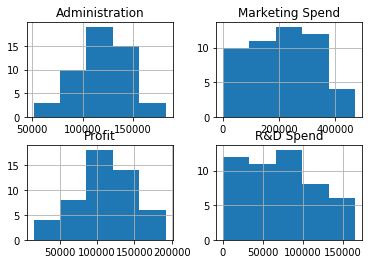

In [3]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df.hist(bins=5)

Q1. What can you infer from the histograms? <br/>
Ans- We don't have a normal distribution

Compute the correlation matrix to get an understanding of the correlation between profit and different kinds of expenditure.<br/>



                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


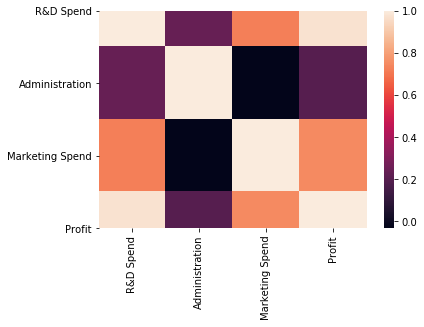

In [4]:
### WRITE CODE TO OBTAIN AND DISPLAY CORRELATION MATRIX ###
# calculating the correlation matrix
corr = df.corr()

print(corr)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Answer the following questions:<br/>

Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans - Diagonals represent the same features thus, the correlation would always be 1 since they are the same thing.

Q3. Why is the matrix symmetric along diagonal?<br/>
Ans - The matrix is symmetrical as we are using the same correlations where the only difference is that i and j are flipped.

Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with profit as the outcome, which one would you choose and why? <br/>
Ans - R & D Spend as that has the maximum correlation with profit.


## Simple Linear Regression

Simple linear regression describes the case where we have a single predictor and a single outcome. We are interested in finding the "line of best fit" for the data. There are two constraints that guide us to the simple linear regression solution:

1. "line": characterized by a slope and intercept
2. "best fit": Minimizes the sum of squares and passes through the mean.

More formally, given some set of points (X, Y), we want to find a line of the form <br/>
$y = \beta_1 x + \beta_0$<br/>

That minimizes <br/>
$\sum(y-\hat{y})^2$<br/>

Through a bit of algebra, we find:<br/>
$\hat{\beta_1} = \dfrac{\sum((x_i-\bar{x})(y_i-\bar{y}))}{\sum(x_i - \bar{x})^2}$<br/>
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$<br/>

Please use base python to implement simple_linear_regression() in regression_utils.py<br/>
Perform simple linear regression on the dataset with profit as the outcome. Use the predictor you chose in Q4.

In [5]:
from regression_utils import simple_linear_regression

In [6]:
### BELOW ENTER THE NAME OF THE COULMN YOU CHOSE AS A PREDICTOR IN Q4
x1 = df["R&D Spend"].values.reshape(-1,1) 
y1 = df["Profit"].values
b1, b0 = simple_linear_regression(x1, y1)
reg = LinearRegression().fit(x1, y1)
reg.coef_

array([0.85429137])

Q5. Print the slope and the intercept obtained

In [7]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = 0.8542913709388088
Intercept(b0) = 49032.89914125214


### Prediction

Using a model that has R&D Spend as the predictor and Profit as the outcome, make the following predictions.
(If you have already implemented the model with R&D as the predictor in the previous question, you don't need to rewrite it. Use the model to make predcitions.)

In [8]:
reg.predict(np.array([[50000], [75000], [100000], [200000]]))

array([ 91747.46768819, 113104.75196166, 134462.03623513, 219891.17332901])

In [9]:
### CODE FOR THE MODEL AND PREDICTIONS
rnd_expenditures_for_prediction = [50000, 75000, 100000, 200000]
for rnd in rnd_expenditures_for_prediction:
    print(b0 + b1*rnd)

91747.46768819258
113104.75196166281
134462.036235133
219891.17332901392


Q6. For a company that spends 50k on R&D Spend, what would be the profit?<br/>
Ans- 91747.46768819258

Q7. For a company that spends 75k on R&D Spend, what would be the profit?<br/>
Ans- 113104.75196166281

Q8. For a company that spends 100k on R&D Spend, what would be the profit?<br/>
Ans- 134462.036235133

Q9. For a company that spends 200k on R&D Spend, what would be the profit?<br/>
Ans- 219891.17332901392


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Note down the results after performing Z-score Normalization on R&D feature.


In [10]:
from sklearn.preprocessing import StandardScaler
x1 = df["R&D Spend"].values.reshape(-1,1)
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
y1 = df["Profit"].values
b1, b0 = simple_linear_regression(x1, y1)
reg = LinearRegression().fit(x1, y1)
reg.coef_

array([38819.78205266])

Q10. Print the slope and the intercept obtained

In [11]:
print("Slope(b1) = " + str(b1))
print("Intercept(b0) = " + str(b0))

Slope(b1) = 38819.782052658564
Intercept(b0) = 112012.63920000002


Q11. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans- The advantage of Z-score normalization is that when we apply it to our numeric dataset it converts the values into a normal distribution where the mean is 0 and variance is 1. This allows our model to handle different data with different units and allows our model to avoid underfitting. The disadvantage of using this approach is that if its not possible for us to get a normal distribution, the scores cannot be interpreted properly.

Q12. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- Yes, we do need normalization as if we see our dataset plot before, we can deduce that our features are not distributed.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the dataset with predictors as R&D Spend, Administration, Marketing Spend, State and outcome as Profit.

R&D Spend, Administration and Marketing Spend are continuous values whereas State contains discrete values. State can only take on the values New York, California or Florida. We need to perform one-hot encoding on State values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code for performing one-hot encoding is provided below. 

Please use numpy to implement multiple_regression() in regression_utils.py and use it below.


In [12]:
from regression_utils import multiple_regression

In [13]:
x2 = df[["R&D Spend","Administration","Marketing Spend"]]
one_hot = pd.get_dummies(df[["State"]])
x2 = pd.concat([x2,one_hot],axis=1)

y2 = df["Profit"].values
bhat = multiple_regression(x2, y2)

reg = LinearRegression().fit(x2, y2)
reg.coef_


array([ 0.00000000e+00,  8.06023114e-01, -2.70043196e-02,  2.69798610e-02,
       -5.23005912e+01,  1.46488202e+02, -9.41876104e+01])

Q13. Print the value of bhat

In [14]:
print(bhat)

[ 3.76332333e+04  8.06023114e-01 -2.70043195e-02  2.69798610e-02
  1.24921105e+04  1.26908993e+04  1.24502235e+04]


Q14. Is there a problem of multicolinearity? Explain what you can do<br/>
Ans- There is multicolineraity as the values are pretty similar. We can perform dimension reduction and remove the values that are correlated.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. Implement calculate_r2() in regression_utils.py and then run the cells below.

Consider 4 Simple Linear Regression models using the 4 predictors and compute R2 for each to compare the models.

Fill in the code for calculation of R2 score in calculate_r2 in regression_utils.py

In [15]:
from regression_utils import calculate_r2, predict
from sklearn.metrics import r2_score

In [16]:
from typing import List

class LinearReg:
    """
    Linear regression utility class which is going to be used for
    understanding / predicting the variables based on the data-set
    """
    def __init__(self, df: pd.DataFrame, columns: List):
        """
        Instantiate the object's attributes.
        """
        self.df = df.copy(deep=True)
        self.columns = columns
        self.target = df["Profit"].values
        self.beta_dict = {}
    
    def predict_util(self):
        """
        This function would allow us to implement the mathematical formulation to implement
        linear regression.
        """
        b_coeff = [self.beta_dict[column] for column in self.columns]
        if 'B0' not in b_coeff:
            b_coeff.insert(0, self.beta_dict['B0'])
        return predict(self.df[self.columns], b_coeff)
    

    def fetch_multiple_linear_regression_coeff(self):
        """
        This function allows us to understand how we need to handle the columns which
        are categorical and which are not. After applying the necessary transformations,
        it is able to fetch the beta values which can be used for predicting the variables.
        """
        temp_df = self.df[self.columns].copy()
        categorical_df = temp_df.select_dtypes(include=['object'])
        temp_df = temp_df.select_dtypes(exclude=['object'])

        if (not(categorical_df.empty)):
            one_hot = pd.get_dummies(categorical_df)
            self.df = pd.concat([temp_df, one_hot], axis=1)
            self.columns = self.df.columns
        else:
            self.df = temp_df

        bhat = multiple_regression(self.df, self.target)
        self.beta_dict = dict(zip(self.df.columns, bhat))

    def compute_r2_score(self) -> float:
        """
        This function is our main utility function which fetches all the coeffecients from
        our variables and applies them to make predictions. It then calls the calculate_r2 method
        which applies the mathematical formulas.
        """
        self.fetch_multiple_linear_regression_coeff()
        yhat = self.predict_util()
        return calculate_r2(self.target, yhat)
    
    def compute_adjusted_r2_score(self) -> float:
        """
        This function is our main utility function which fetches all the coeffecients from
        our variables and applies them to make predictions. It then calls the calculate_adjusted_r2 method
        which applies the mathematical formulas.
        """
        self.fetch_multiple_linear_regression_coeff()
        yhat = self.predict_util()
        return calculate_adjusted_r2(self.target, yhat, len(self.columns))



#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [17]:
LinearReg(df, ['R&D Spend']).compute_r2_score()

0.9465353160804393

#### R2 score for model with "Marketing Spend" as predictor and "Profit" as outcome

In [18]:
LinearReg(df, ['Marketing Spend']).compute_r2_score()

0.5591535746115515

#### R2 score for model with "Administration" as predictor and "Profit" as outcome

In [19]:
LinearReg(df, ['Administration', 'Marketing Spend']).compute_r2_score()

0.6097229746770663

#### R2 score for model with "State" as predictor and "Profit" as outcome

In [20]:
LinearReg(df, ['State']).compute_r2_score()

0.023875218249123975

Now, add features one by one and compute R2 score of different models

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [21]:
LinearReg(df, ['R&D Spend']).compute_r2_score()

0.9465353160804393

#### R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [22]:
LinearReg(df, ['R&D Spend', 'Marketing Spend']).compute_r2_score()

0.9504503015559763

#### R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [23]:
LinearReg(df, ['R&D Spend', 'Marketing Spend', 'Administration']).compute_r2_score()

0.9507459940683246

#### R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome

In [24]:
LinearReg(df, df.columns).compute_r2_score()

1.0

Wait a minute, $R^2$ is always going up as we keep adding features? 

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score in calculate_adjusted_r2 in regression_utils.py

In [25]:
from regression_utils import calculate_adjusted_r2

#### Adjusted R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [26]:
LinearReg(df, ['R&D Spend']).compute_adjusted_r2_score()

0.9454214684987817

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [27]:
LinearReg(df, ['R&D Spend', 'Marketing Spend']).compute_adjusted_r2_score()

0.9483418037498477

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [28]:
LinearReg(df, ['R&D Spend', 'Marketing Spend', 'Administration']).compute_adjusted_r2_score()

0.9475337762901719

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome


In [29]:
LinearReg(df, df.columns).compute_adjusted_r2_score()

1.0

Q15. Using the above Adjusted R2 scores, the combination with the highest Adjusted R2 score is associated with the model built with most relevant predictors. Note down the most relevant combination of predictors in predicting the profit of the startup.

Ans - Through the outputs, we can see that it is more effecient to just use the **R&D Spend** feature as it performs much better than all the other models (while looking at the adjusted r2 score). If we do not have any restrictions with applying as many features as we want, we could consider applying all as they all have a linear relationship but that might lead to some problems later on such. Therefore, it is much better to just apply a single feature, than all of them combined.